In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.externals import joblib


In [0]:
train_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/train_1793_7172.csv')
val_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_VALIDATION_v1.csv')
train_df = train_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
val_df = val_df.drop('Unnamed: 0',axis=1)


In [0]:
x = train_df.drop(['click','bidid','userid','city','payprice','bidprice'],axis=1)
y = train_df['click']

logreg = LogisticRegression()
logreg.fit(x, y)

x2 = val_df.drop(['click','bidid','userid','city','payprice','bidprice'],axis=1)
y2 = val_df['click']


y_pred = logreg.predict(x2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x2, y2)))

conf_mat = confusion_matrix(y2, y_pred)
print('Confusion matrix: ','\n',conf_mat, '\n')
print(classification_report(y2, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.93
Confusion matrix:  
 [[283708  20015]
 [   150     52]] 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    303723
           1       0.00      0.26      0.01       202

   micro avg       0.93      0.93      0.93    303925
   macro avg       0.50      0.60      0.49    303925
weighted avg       1.00      0.93      0.97    303925



# Features Selection

In [0]:
# Precision = TP/TP+FP
# Recall = TP/TP+FN
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# F1 score - F1 Score is the weighted average of Precision and Recall. 
# Therefore, this score takes both false positives and false negatives into account. 
# Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, 
# especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. 
# If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

# loop through each number to find optimal features

for i in range(60, 201, 10):
  
  x = train_df.drop(['click','bidid','userid','city','payprice','bidprice'],axis=1)
  y = train_df['click']
  
  logreg = LogisticRegression()

  rfe = RFE(logreg, i)
  rfe = rfe.fit(x, y)

  selected_features = []

  for j in range(len(x.columns.tolist())):
    if rfe.ranking_[j] == 1:
      selected_features.append(x.columns.tolist()[j])

  x = train_df[selected_features]
  y = train_df['click']

  logreg.fit(x, y)

  x2 = val_df[selected_features]
  y2 = val_df['click']


  y_pred = logreg.predict(x2)
  print('At ' + str(i) + ' feature, accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x2, y2)))

  conf_mat = confusion_matrix(y2, y_pred)
  print('Confusion matrix: ','\n',conf_mat, '\n')
  print(classification_report(y2, y_pred), '\n')
  
  # best number of features after grid search: 130


In [0]:
logreg = LogisticRegression()

x = train_df.drop(['click','bidid','userid','city','payprice','bidprice'],axis=1)
y = train_df['click']  

rfe = RFE(logreg, n_features_to_select = 130)
rfe = rfe.fit(x, y)

selected_features = []

for j in range(len(x.columns.tolist())):
  if rfe.ranking_[j] == 1:
    selected_features.append(x.columns.tolist()[j])

x = train_df[selected_features]
y = train_df['click']

logreg.fit(x, y)

x2 = val_df[selected_features]
y2 = val_df['click']


y_pred = logreg.predict(x2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x2, y2)))

conf_mat = confusion_matrix(y2, y_pred)
print('Confusion matrix: ','\n',conf_mat, '\n')
print(classification_report(y2, y_pred), '\n')

  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy of logistic regression classifier on test set: 0.96
Confusion matrix:  
 [[292717  11006]
 [   100    102]] 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    303723
           1       0.01      0.50      0.02       202

   micro avg       0.96      0.96      0.96    303925
   macro avg       0.50      0.73      0.50    303925
weighted avg       1.00      0.96      0.98    303925
 



# Grid search parameter

In [0]:
c_values = [0.01,0.1,0.5,1,5,10]

grid_values = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs']}
]

grid = GridSearchCV(LogisticRegression(), param_grid = grid_values, cv = 3, scoring='f1', iid=False)
grid.fit(x, y)
print(grid.best_params_)
print(grid.best_estimator_)

# Grid search output:
# {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
# LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='warn',
#           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
#           tol=0.0001, verbose=0, warm_start=False)

In [0]:

logreg = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

x = train_df[selected_features]
y = train_df['click']

logreg.fit(x, y)

x2 = val_df[selected_features]
y2 = val_df['click']

y_pred = logreg.predict(x2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x2, y2)))

conf_mat = confusion_matrix(y2, y_pred)
print('Confusion matrix: ','\n',conf_mat, '\n')
print(classification_report(y2, y_pred), '\n')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy of logistic regression classifier on test set: 0.96
Confusion matrix:  
 [[292724  10999]
 [   100    102]] 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    303723
           1       0.01      0.50      0.02       202

   micro avg       0.96      0.96      0.96    303925
   macro avg       0.50      0.73      0.50    303925
weighted avg       1.00      0.96      0.98    303925
 



# Save model

In [0]:
selected_features = ['weekday_0', 'weekday_3', 'weekday_4','weekday_5', 'weekday_6', 'adexchange_1.0', 'adexchange_2.0', 'adexchange_3.0',
                     'adexchange_4.0', 'slotvisibility_1', 'slotvisibility_FifthView','slotvisibility_FirstView', 'slotvisibility_FourthView',
                     'slotvisibility_Na', 'slotvisibility_OtherView', 'slotformat_0', 'slotformat_1', 'slotformat_5', 'slotformat_Na', 
                     'advertiser_2259','advertiser_2261', 'advertiser_2997', 'advertiser_3358', 'advertiser_3386', 'domain5', 'region_0', 
                     'region_1', 'region_2', 'region_3', 'region_15', 'region_40', 'region_55', 'region_79', 'region_94', 'region_106', 
                     'region_124', 'region_183', 'region_201', 'region_216', 'region_253', 'region_275', 'region_276', 'region_298', 
                     'region_308','region_325','region_333','region_344','region_359', 'region_368','region_374','region_393','region_394',
                     'region_395','usertag_10006','usertag_10063','usertag_13496','usertag_13403','usertag_10031','usertag_10059',
                     'usertag_11278','usertag_11724','usertag_16661','usertag_11379','usertag_10684','usertag_11576', 'usertag_11632',
                     'usertag_13042','usertag_14273','usertag_13776','usertag_10079','usertag_10149','usertag_10120','usertag_10133',
                     'usertag_10116','usertag_10076','usertag_11092','usertag_10131','usertag_10115','usertag_10117','usertag_10126',
                     'usertag_16593','usertag_11944','usertag_10148','usertag_16706','usertag_10123','usertag_10074','usertag_13678',
                     'usertag_10114','usertag_10129','usertag_10146','usertag_10145','usertag_11512','usertag_16617','usertag_10147',
                     'usertag_16753','usertag_10140','usertag_10138','usertag_10142','usertag_13874','usertag_10130','os_android','os_ios',
                     'os_linux','os_other','os_windows','browser_chrome','browser_firefox','browser_maxthon','browser_opera','browser_other',
                     'browser_safari','browser_theworld','slotsize_1000*90','slotsize_125*125','slotsize_180*600','slotsize_200*200',
                     'slotsize_250*250','slotsize_300*100','slotsize_300*250','slotsize_300*300','slotsize_320*50','slotsize_336*280',
                     'slotsize_360*300','slotsize_468*60','slotsize_620*60','slotsize_728*90','slotsize_910*90','slotsize_960*90',
                     'slotsize_980*80','slotsize_980*90']

x = train_df[selected_features]
y = train_df['click']

x2 = val_df[selected_features]
y2 = val_df['click']

In [0]:
# # save model
# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# joblib.dump(logreg, filename)

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)
result = loaded_logreg.score(x2, y2)
print(result)

0.9634811219873324


# Linear Bidding Function (With recalibration)

In [0]:
# Linear strategy
# recalibrate model * 100
BASE_BID = []
CLICKS = []
IMPRESSIONS = [] 
SPEND = [] 
CTR = [] 
CPM = [] 
eCPC = []

pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
bid = 0


for b in range(1,501): # try different base bids to find bid price for each row
  current_bid = b*pCTR/avgCTR
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     


  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  BASE_BID.append(b)
  CLICKS.append(clicks)
  IMPRESSIONS.append(impressions)
  SPEND.append(Spent)
  CTR.append(Ctr)
  eCPC.append(ecPC)
  CPM.append(cPM)
  print ('For base bid =',b, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')

MAX_CLICKS = max(CLICKS)
best_index = CLICKS.index(max(CLICKS))
FINAL_BASE_BID = BASE_BID[best_index]
FINAL_IMPRESSIONS = IMPRESSIONS[best_index]
FINAL_SPEND = SPEND[best_index]
FINAL_CTR = CTR[best_index]
FINAL_eCPC = eCPC[best_index]
FINAL_CPM = CPM[best_index]


# Output:
# For base bid = 305  impressions = 129879  Clicks = 158  Spent amount =  6250000  eCPC is  39556.962025316454
#  CTR = 0.0012165169118949176  CPM is  48121.7132869825


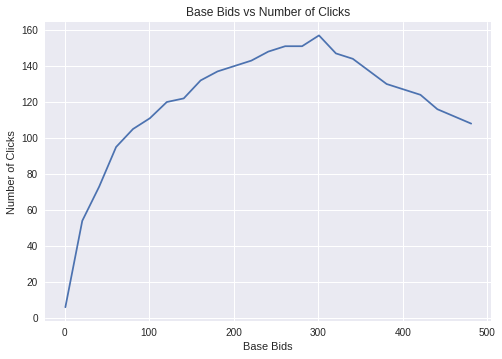

In [0]:
plt.plot(BASE_BID, CLICKS)
plt.xlabel('Base Bids')
plt.ylabel('Number of Clicks')
plt.title('Base Bids vs Number of Clicks')
plt.show()

Predict on val

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
final_bids = 305*pCTR/avgCTR

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_LINEAR_RECAL.csv', sep=',')
group_df.head()


Predict on test

In [0]:
# test_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_TEST_v1.csv')
# test_df['click'] = 0
# test_df = test_df.drop('Unnamed: 0',axis=1)

# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# loaded_logreg = joblib.load(filename)

# x3 = test_df[selected_features]
# y3 = test_df['click']

# y_pred = loaded_logreg.predict(x3)
# pCTR = loaded_logreg.predict_proba(x3)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
# avgCTR = len(train_df[train_df['click']==1])/len(train_df)
# final_bids = 305*pCTR/avgCTR

# group_df = pd.read_csv('/content/gdrive/My Drive/we_data/Group_xx.csv')
# group_df['bidprice'] = final_bids
# group_df['Probability'] = pCTR
# group_df['Click'] = y_pred
# group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/FINAL_LR_LINEAR_RECAL.csv', sep=',')
# group_df.head()

# Linear Bidding Function (No recalibration)

In [0]:
# Linear strategy
# without recalibration

pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# re_CTR = pCTR/(pCTR+(1-pCTR)/w)
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
bid = 0


for b in range(1,301): # try different base bids to find bid price for each row
  current_bid = b*pCTR/avgCTR
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     


  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  BASE_BID.append(b)
  CLICKS.append(clicks)
  IMPRESSIONS.append(impressions)
  SPEND.append(Spent)
  CTR.append(Ctr)
  eCPC.append(ecPC)
  CPM.append(cPM)
  print ('For base bid =',b, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# Without recalibration
# For base bid = 107  impressions = 135244  Clicks = 157  Spent amount =  6242909  eCPC is  39763.75159235669
#  CTR = 0.00116086480731123  CPM is  46160.33983023276


Predict on validation

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
final_bids = 107*pCTR/avgCTR

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_LINEAR_NO_RECAL.csv', sep=',')
group_df.head()


Predict on test

In [0]:
# test_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_TEST_v1.csv')
# test_df['click'] = 0
# test_df = test_df.drop('Unnamed: 0',axis=1)

# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# loaded_logreg = joblib.load(filename)

# x3 = test_df[selected_features]
# y3 = test_df['click']

# y_pred = loaded_logreg.predict(x3)
# pCTR = loaded_logreg.predict_proba(x3)[:,1]
# # w = 7172/(2430981-1793)
# # pCTR = pCTR/(pCTR+(1-pCTR)/w)
# # pCTR *= 100
# avgCTR = len(train_df[train_df['click']==1])/len(train_df)
# final_bids = 107*pCTR/avgCTR

# group_df = pd.read_csv('/content/gdrive/My Drive/we_data/Group_xx.csv')
# group_df['bidprice'] = final_bids
# group_df['Probability'] = pCTR
# group_df['Click'] = y_pred
# group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/FINAL_LR_LINEAR_NO_RECAL.csv', sep=',')
# group_df.head()

# Squared Function (No recalibration)

In [0]:
# Linear strategy
# without recalibration


pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# re_CTR = pCTR/(pCTR+(1-pCTR)/w)
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
bid = 0


for b in range(1,301): # try different base bids to find bid price for each row
  current_bid = b*(pCTR/avgCTR)**2
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     


  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  BASE_BID.append(b)
  CLICKS.append(clicks)
  IMPRESSIONS.append(impressions)
  SPEND.append(Spent)
  CTR.append(Ctr)
  eCPC.append(ecPC)
  CPM.append(cPM)
  print ('For base bid =',b, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For base bid = 135  impressions = 110916  Clicks = 155  Spent amount =  6153727  eCPC is  39701.46451612903
#  CTR = 0.0013974539290994986  CPM is  55480.96757906884



In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
final_bids = 135*(pCTR/avgCTR)**2

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_SQUARED_NO_RECAL.csv', sep=',')
group_df.head()

# ORTB 1 (With recalibration)

In [0]:
# non-linear bidding strategy
# ORTB1 with recalibration
# find c

pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
# lamda = [1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7]
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
lamda = 1e-3

# for lamda in lamda_list:
for c in range(1, 301):
  current_bid = ((c/lamda)*pCTR + c**2)**0.5 - c
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  winning_rate = current_bid/(c+current_bid)

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     

  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For lambda =  0.001  c =  239  impressions = 45777  Clicks = 105  Spent amount =  1459447  eCPC is  13899.495238095238
#  CTR = 0.0022937282915000985  CPM is  31881.66546518994

In [0]:
# non-linear bidding strategy
# ORTB1 with recalibration
# find lamda

pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
# lamda_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
# lamda_list = [0.001, 0.0008, 0.00075, 0.0005, 0.0003, 0.00025]
lamda_list = [0.000275, 0.00025, 0.000245, 0.00024, 0.000235, 0.00023]

# for lamda in lamda_list:
for lamda in lamda_list:
  current_bid = ((239/lamda)*pCTR + c**2)**0.5 - c
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  winning_rate = current_bid/(c+current_bid)

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     

  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', 239, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For lambda =  0.000235  c =  239  impressions = 131906  Clicks = 157  Spent amount =  6135344  eCPC is  39078.62420382166
#  CTR = 0.0011902415356390156  CPM is  46513.00168301669


Predict on Validation

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
c = 239
lamda = 0.000235
final_bids = ((c/lamda)*pCTR + c**2)**0.5 - c

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_ORTB1_RECAL.csv', sep=',')
group_df.head()

Predict on Test

In [0]:
# test_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_TEST_v1.csv')
# test_df['click'] = 0
# test_df = test_df.drop('Unnamed: 0',axis=1)

# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# loaded_logreg = joblib.load(filename)

# x3 = test_df[selected_features]
# y3 = test_df['click']

# y_pred = loaded_logreg.predict(x3)
# pCTR = loaded_logreg.predict_proba(x3)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
# c = 239
# lamda = 0.000235
# final_bids = ((c/lamda)*pCTR + c**2)**0.5 - c

# group_df = pd.read_csv('/content/gdrive/My Drive/we_data/Group_xx.csv')
# group_df['bidprice'] = final_bids
# group_df['Probability'] = pCTR
# group_df['Click'] = y_pred
# group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/FINAL_LR_ORTB1_RECAL.csv', sep=',')
# group_df.head()

# ORTB 1 (No recalibration)

In [0]:
# non-linear bidding strategy
# find c

pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
# lamda_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
lamda = 1e-3

# for lamda in lamda_list:
for c in range(1, 501):
  current_bid = ((c/lamda)*pCTR + c**2)**0.5 - c
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  winning_rate = current_bid/(c+current_bid)

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     

  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')



# For lambda =  0.001  c =  471  impressions = 121045  Clicks = 144  Spent amount =  5122342  eCPC is  35571.819444444445
#  CTR = 0.0011896402164484282  CPM is  42317.6669833533

In [0]:
# non-linear bidding strategy
# find lamda

pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
lamda_list = [0.000899, 0.000898, 0.000897]
avgCTR = len(train_df[train_df['click']==1])/len(train_df)
lamda = 1e-3
c = 471

for lamda in lamda_list:
# for c in range(461, 501):
  current_bid = ((c/lamda)*pCTR + c**2)**0.5 - c
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  winning_rate = current_bid/(c+current_bid)

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     

  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')



# For lambda =  0.00089  c =  471  impressions = 133080  Clicks = 154  Spent amount =  5937135  eCPC is  38552.82467532468
#  CTR = 0.0011571986774872257  CPM is  44613.277727682595

Predict on Validation

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
c = 471
lamda = 0.00089
final_bids = ((c/lamda)*pCTR + c**2)**0.5 - c

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_ORTB1_NO_RECAL.csv', sep=',')
group_df.head()

Predict on Test

In [0]:
# test_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_TEST_v1.csv')
# test_df['click'] = 0
# test_df = test_df.drop('Unnamed: 0',axis=1)

# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# loaded_logreg = joblib.load(filename)

# x3 = test_df[selected_features]
# y3 = test_df['click']

# y_pred = loaded_logreg.predict(x3)
# pCTR = loaded_logreg.predict_proba(x3)[:,1]
# # w = 7172/(2430981-1793)
# # pCTR = pCTR/(pCTR+(1-pCTR)/w)
# # pCTR *= 100
# c = 471
# lamda = 0.000235
# final_bids = ((c/lamda)*pCTR + c**2)**0.5 - c

# group_df = pd.read_csv('/content/gdrive/My Drive/we_data/Group_xx.csv')
# group_df['bidprice'] = final_bids
# group_df['Probability'] = pCTR
# group_df['Click'] = y_pred
# group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/FINAL_LR_ORTB1_NO_RECAL.csv', sep=',')
# group_df.head()

# ORTB 2 (With recalibration)

In [0]:
# non-linear bidding strategy
# ORTB2 with recalibration
# find c

pCTR = loaded_logreg.predict_proba(x2)[:,1]
# lamda_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
lamda = 0.001

# for lamda in lamda_list:
for c in range(1, 301): # try different base bids to find bid price for each row
  current_bid = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     


  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For lambda =  0.001  c =  124  impressions = 41207  Clicks = 104  Spent amount =  1386415  eCPC is  13330.913461538461
#  CTR = 0.0025238430363773144  CPM is  33645.13310845245

# For lambda =  0.001  c =  285  impressions = 38889  Clicks = 105  Spent amount =  1393924  eCPC is  13275.466666666667
#  CTR = 0.0026999922857363265  CPM is  35843.657589549744


In [0]:
# non-linear bidding strategy
# ORTB2 with recalibration
# find lamda

pCTR = loaded_logreg.predict_proba(x2)[:,1]

# for c = 124
# lamda_list = [0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001]
# lamda_list = [0.00035, 0.0003, 0.00025]
# lamda_list = [0.00034, 0.00033, 0.00032, 0.00031, 0.0003, 0.00029, 0.00028, 0.00027, 0.00026, 0.00025]
# lamda_list = [0.00029, 0.000285, 0.00028, 0.000275]
# lamda_list = [0.000285, 0.000284, 0.000283, 0.000282, 0.000281, 0.00028, 0.000279, 0.000278]
# lamda_list = [0.0002835, 0.000283]

# for c = 285
# lamda_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
# lamda_list = [0.00075, 0.0005, 0.00025]
# lamda_list = [0.00045, 0.0004, 0.00035, 0.0003, 0.00025, 0.00024, 0.00023]
# lamda_list = [0.00034, 0.00033, 0.00032, 0.00031, 0.0003, 0.00029, 0.00028, 0.00027]
lamda_list = [0.00029, 0.000289, 0.000288, 0.000287, 0.000286, 0.0002850, 0.000284]


w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
lamda = 0.001
# c = 124
c = 285

for lamda in lamda_list:
# for c in range(1, 301): # try different base bids to find bid price for each row
  current_bid = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     


  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For lambda =  0.000283  c =  124  impressions = 132325  Clicks = 158  Spent amount =  6204304  eCPC is  39267.74683544304
#  CTR = 0.0011940298507462687  CPM is  46886.861893066314


# For lambda =  0.00029  c =  285  impressions = 126699  Clicks = 159  Spent amount =  6167789  eCPC is  38791.125786163524
#  CTR = 0.0012549428172282339  CPM is  48680.64467754284

Predict on Validation (c = 285)

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
c = 285
lamda = 0.00029
final_bids = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_ORTB2_c285_RECAL.csv', sep=',')
group_df.head()

Predict on Test (c = 124)

In [0]:
# test_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_TEST_v1.csv')
# test_df['click'] = 0
# test_df = test_df.drop('Unnamed: 0',axis=1)

# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# loaded_logreg = joblib.load(filename)

# x3 = test_df[selected_features]
# y3 = test_df['click']

# y_pred = loaded_logreg.predict(x3)
# pCTR = loaded_logreg.predict_proba(x3)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
# c = 285
# lamda = 0.00029
# final_bids = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))

# group_df = pd.read_csv('/content/gdrive/My Drive/we_data/Group_xx.csv')
# group_df['bidprice'] = final_bids
# group_df['Probability'] = pCTR
# group_df['Click'] = y_pred
# group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/FINAL_LR_ORTB2_c285.csv', sep=',')
# group_df.head()

Predict on Validation (c = 124)

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
w = 7172/(2430981-1793)
pCTR = pCTR/(pCTR+(1-pCTR)/w)
pCTR *= 100
c = 124
lamda = 0.000283
final_bids = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/VAL_LR_ORTB2_c124_RECAL.csv')
group_df.head()

# ORTB 2 (No recalibration)

In [0]:
# non-linear bidding strategy
# ORTB2 with recalibration
# find c

pCTR = loaded_logreg.predict_proba(x2)[:,1]
# lamda_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
# lamda = 0.001

# for lamda in lamda_list:
for c in range(1, 301): # try different base bids to find bid price for each row
  current_bid = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     

  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For lambda =  0.001  c =  295  impressions = 108862  Clicks = 144  Spent amount =  4650745  eCPC is  32296.840277777777
#  CTR = 0.0013227756241847477  CPM is  42721.4730576326

In [0]:
# non-linear bidding strategy
# ORTB2 with recalibration
# find lamda

pCTR = loaded_logreg.predict_proba(x2)[:,1]
lamda_list = [0.000839, 0.000838, 0.000837, 0.000836, 0.000835, 0.000834, 0.000833, 0.000832, 0.000831, 0.00083]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
# lamda = 0.001
c = 295

for lamda in lamda_list:
# for c in range(281, 311): # try different base bids to find bid price for each row
  current_bid = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))
  budget = 6250 * 1000
  clicks = 0
  impressions = 0

  for j in range(len(current_bid)): # check the bid price can give how many clicks given the base bid
    payprice = val_df.payprice[j]
    if current_bid[j] > payprice:
      budget = budget - payprice
      if budget >=0:
        impressions+=1
        if (val_df.click[j]==1):
                clicks +=1
      else:
        budget = budget+payprice
        break     

  Ctr = clicks/impressions
  Spent = 6250000 - budget
  cPM = 1000*Spent/impressions
  if (clicks >0):
      ecPC = Spent/clicks
  else:
      ecPC =0

  print ('For lambda = ', lamda, ' c = ', c, ' impressions =',impressions,' Clicks =',clicks,' Spent amount = ',Spent, ' eCPC is ',ecPC) 
  print ( ' CTR =',Ctr, ' CPM is ',cPM)
  print (' ------->')


# For lambda =  0.00083  c =  295  impressions = 129026  Clicks = 155  Spent amount =  5986743  eCPC is  38624.14838709677
#  CTR = 0.0012013082634507774  CPM is  46399.50862616837

Predict on Validation

In [0]:
filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
loaded_logreg = joblib.load(filename)

x2 = val_df[selected_features]
y2 = val_df['click']

y_pred = loaded_logreg.predict(x2)
pCTR = loaded_logreg.predict_proba(x2)[:,1]
# w = 7172/(2430981-1793)
# pCTR = pCTR/(pCTR+(1-pCTR)/w)
# pCTR *= 100
c = 295
lamda = 0.00083
final_bids = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))

group_df = val_df[['bidid']]
group_df['bidprice'] = final_bids
group_df['Probability'] = pCTR
group_df['Click'] = y_pred
group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/VAL_LR_ORTB2_NO_RECAL.csv', sep=',')
group_df.head()

Predict on Test

In [0]:
# test_df = pd.read_csv('/content/gdrive/My Drive/we_data/FINAL_CSVs/FINAL_TEST_v1.csv')
# test_df['click'] = 0
# test_df = test_df.drop('Unnamed: 0',axis=1)

# filename = '/content/gdrive/My Drive/we_data/Models/Logistic_Regression_Model.sav'
# loaded_logreg = joblib.load(filename)

# x3 = test_df[selected_features]
# y3 = test_df['click']

# y_pred = loaded_logreg.predict(x3)
# pCTR = loaded_logreg.predict_proba(x3)[:,1]
# # w = 7172/(2430981-1793)
# # pCTR = pCTR/(pCTR+(1-pCTR)/w)
# # pCTR *= 100
# c = 285
# lamda = 0.00029
# final_bids = c*((((pCTR+(c**2 * lamda**2 + pCTR**2)**0.5)/(c*lamda))**(1/3))-(((c*lamda)/(lamda + (c**2 * lamda**2 + pCTR**2)**0.5))**(1/3)))

# group_df = pd.read_csv('/content/gdrive/My Drive/we_data/Group_xx.csv')
# group_df['bidprice'] = final_bids
# group_df['Probability'] = pCTR
# group_df['Click'] = y_pred
# group_df.to_csv('/content/gdrive/My Drive/we_data/SUBMISSION_BIDS/DIFFERENT_pBIDPRICES/FINAL_LR_ORTB2_c285.csv', sep=',')
# group_df.head()